In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import os
os.chdir(r'C:\Users\RONALD\Desktop\Python Code\Practise\Projects\Decision Tree')

In [3]:
customer_data = pd.read_csv("german_credit_data_dataset.csv")
customer_data.head()

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
0,< 0 DM,6,Critical Account/Other Credit Existing(Not thi...,Radio/TV,1169,Unknown/ No Saving Ac,>=7,4,Male (Single),none,...,Real Estate,67,none,Own,2,SkilledEmployee/Official,1,Yes,Yes,Good
1,0 - 20 DM,48,Existing Credits Paid Back,Radio/TV,5951,<100,1 to 4,2,Female (Div/Sep/Married),none,...,Real Estate,22,none,Own,1,SkilledEmployee/Official,1,None,Yes,Bad
2,No Checking Account,12,Critical Account/Other Credit Existing(Not thi...,Education,2096,<100,4 to 7,2,Male (Single),none,...,Real Estate,49,none,Own,1,Unskilled Resident,2,None,Yes,Good
3,< 0 DM,42,Existing Credits Paid Back,Furniture/Equipment,7882,<100,4 to 7,2,Male (Single),guarantor,...,Society Saving/ Life Insurance,45,none,For Free,1,SkilledEmployee/Official,2,None,Yes,Good
4,< 0 DM,24,Delay in Payment in past,New Car,4870,<100,1 to 4,3,Male (Single),none,...,Unknown/ No property,53,none,For Free,2,SkilledEmployee/Official,2,None,Yes,Bad


### EDA

#### Univariate Analysis

In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_account_status    1000 non-null object
duration                   1000 non-null int64
credit_history             1000 non-null object
purpose                    1000 non-null object
credit_amount              1000 non-null int64
savings                    1000 non-null object
present_employment         1000 non-null object
installment_rate           1000 non-null int64
personal                   1000 non-null object
other_debtors              1000 non-null object
present_residence          1000 non-null int64
property                   1000 non-null object
age                        1000 non-null int64
other_installment_plans    1000 non-null object
housing                    1000 non-null object
existing_credits           1000 non-null int64
job                        1000 non-null object
dependents                 1000 non-null int64
telephone                  1000 non-n

In [5]:
customer_data.describe() #(include='all')

,duration,credit_amount,installment_rate,present_residence,age,existing_credits,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


### Check missing values

In [6]:
customer_data.isna().sum(axis=0)

checking_account_status    0
duration                   0
credit_history             0
purpose                    0
credit_amount              0
savings                    0
present_employment         0
installment_rate           0
personal                   0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
existing_credits           0
job                        0
dependents                 0
telephone                  0
foreign_worker             0
customer_type              0
dtype: int64

### Check outliers

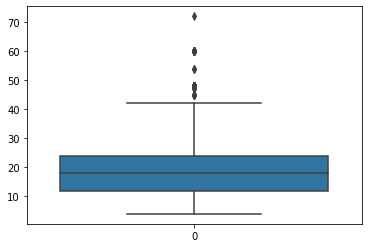

In [7]:
sns.boxplot(data=customer_data['duration'])

In [8]:
q1 = customer_data['duration'].quantile(0.25)
q3 = customer_data['duration'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr  #acceptable range

low, high

(-6.0, 42.0)

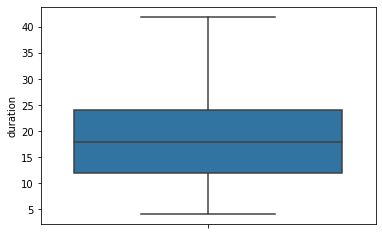

In [9]:
customer_data['duration'] = np.where(customer_data['duration'] > high,high,customer_data['duration'])  #upper limit

customer_data['duration'] = np.where(customer_data['duration'] < low,low,customer_data['duration'])  #lower limit

sns.boxplot(y=customer_data['duration'])    # for horizontal use x instead of y

In [10]:
customer_data['duration'].describe()

count    1000.000000
mean       20.307000
std        10.615151
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        42.000000
Name: duration, dtype: float64

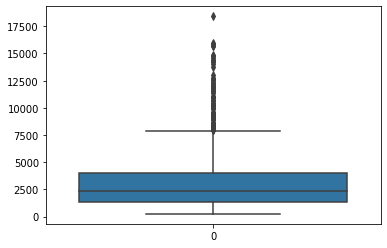

In [11]:
sns.boxplot(data=customer_data['credit_amount'])

In [12]:
q1 = customer_data['credit_amount'].quantile(0.25)
q3 = customer_data['credit_amount'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr  #acceptable range

low, high

(-2544.625, 7882.375)

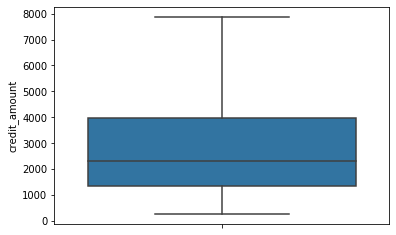

In [13]:
customer_data['credit_amount'] = np.where(customer_data['credit_amount'] > high,high,customer_data['credit_amount'])  #upper limit

customer_data['credit_amount'] = np.where(customer_data['credit_amount'] < low,low,customer_data['credit_amount'])  #lower limit

sns.boxplot(y=customer_data['credit_amount'])    # for horizontal use x instead of y

In [14]:
customer_data['credit_amount'].describe()

count    1000.000000
mean     3051.101000
std      2187.140403
min       250.000000
25%      1365.500000
50%      2319.500000
75%      3972.250000
max      7882.375000
Name: credit_amount, dtype: float64

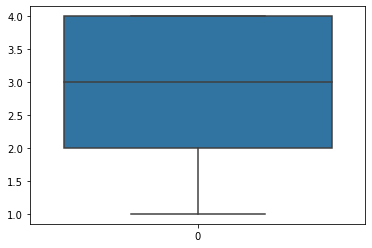

In [15]:
sns.boxplot(data=customer_data['present_residence'])

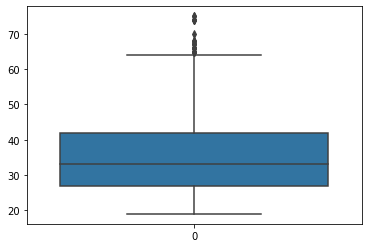

In [16]:
sns.boxplot(data=customer_data['age'])

In [17]:
q1 = customer_data['age'].quantile(0.25)
q3 = customer_data['age'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr  #acceptable range

low, high

(4.5, 64.5)

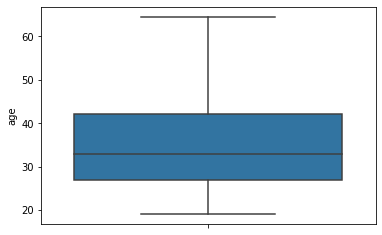

In [18]:
customer_data['age'] = np.where(customer_data['age'] > high,high,customer_data['age'])  #upper limit

customer_data['age'] = np.where(customer_data['age'] < low,low,customer_data['age'])  #lower limit

sns.boxplot(y=customer_data['age'])    # for horizontal use x instead of y

In [19]:
customer_data['age'].describe()

count    1000.000000
mean       35.453500
std        11.106324
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        64.500000
Name: age, dtype: float64

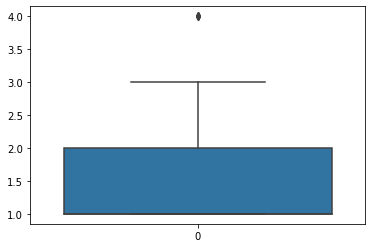

In [20]:
sns.boxplot(data=customer_data['existing_credits'])

In [21]:
q1 = customer_data['existing_credits'].quantile(0.25)
q3 = customer_data['existing_credits'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr  #acceptable range

low, high

(-0.5, 3.5)

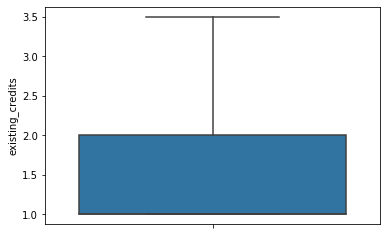

In [22]:
customer_data['existing_credits'] = np.where(customer_data['existing_credits'] > high,high,customer_data['existing_credits'])  #upper limit

customer_data['existing_credits'] = np.where(customer_data['existing_credits'] < low,low,customer_data['existing_credits'])  #lower limit

sns.boxplot(y=customer_data['existing_credits'])    # for horizontal use x instead of y

In [23]:
customer_data['existing_credits'].describe()

count    1000.000000
mean        1.404000
std         0.565335
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.500000
Name: existing_credits, dtype: float64

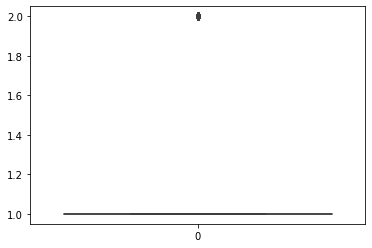

In [24]:
sns.boxplot(data=customer_data['dependents'])

In [25]:
q1 = customer_data['dependents'].quantile(0.25)
q3 = customer_data['dependents'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr  #acceptable range

low, high

(1.0, 1.0)

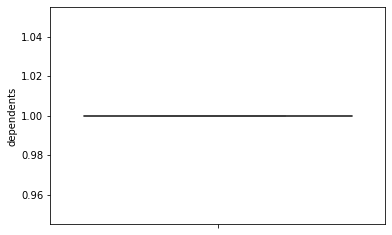

In [26]:
customer_data['dependents'] = np.where(customer_data['dependents'] > high,high,customer_data['dependents'])  #upper limit

customer_data['dependents'] = np.where(customer_data['dependents'] < low,low,customer_data['dependents'])  #lower limit

sns.boxplot(y=customer_data['dependents'])    # for horizontal use x instead of y

In [27]:
customer_data['dependents'].describe()

count    1000.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: dependents, dtype: float64

In [28]:
customer_data.describe()

,duration,credit_amount,installment_rate,present_residence,age,existing_credits,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,20.307000,3051.101000,2.973000,2.845000,35.453500,1.404000,1.0
std,10.615151,2187.140403,1.118715,1.103718,11.106324,0.565335,0.0
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.0
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.0
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.0
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.0
max,42.000000,7882.375000,4.000000,4.000000,64.500000,3.500000,1.0


### Taking subset data of numeric variables

In [29]:
cust_data_num = customer_data[customer_data.select_dtypes(include=[np.number]).columns.tolist()]
cust_data_num.head(5)

,duration,credit_amount,installment_rate,present_residence,age,existing_credits,dependents
0,6.0,1169.0,4,4,64.5,2.0,1.0
1,42.0,5951.0,2,2,22.0,1.0,1.0
2,12.0,2096.0,2,3,49.0,1.0,1.0
3,42.0,7882.0,2,4,45.0,1.0,1.0
4,24.0,4870.0,3,4,53.0,2.0,1.0


### Taking subset data of categorical variables

In [30]:
cust_data_cat = customer_data[customer_data.select_dtypes(include=['object']).columns.tolist()]
cust_data_cat.head(5)

,checking_account_status,credit_history,purpose,savings,present_employment,personal,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker,customer_type
0,< 0 DM,Critical Account/Other Credit Existing(Not thi...,Radio/TV,Unknown/ No Saving Ac,>=7,Male (Single),none,Real Estate,none,Own,SkilledEmployee/Official,Yes,Yes,Good
1,0 - 20 DM,Existing Credits Paid Back,Radio/TV,<100,1 to 4,Female (Div/Sep/Married),none,Real Estate,none,Own,SkilledEmployee/Official,None,Yes,Bad
2,No Checking Account,Critical Account/Other Credit Existing(Not thi...,Education,<100,4 to 7,Male (Single),none,Real Estate,none,Own,Unskilled Resident,None,Yes,Good
3,< 0 DM,Existing Credits Paid Back,Furniture/Equipment,<100,4 to 7,Male (Single),guarantor,Society Saving/ Life Insurance,none,For Free,SkilledEmployee/Official,None,Yes,Good
4,< 0 DM,Delay in Payment in past,New Car,<100,1 to 4,Male (Single),none,Unknown/ No property,none,For Free,SkilledEmployee/Official,None,Yes,Bad


### Converting categorical variable to number

In [31]:
from sklearn.preprocessing import LabelEncoder
cust_data_dummies = cust_data_cat.apply(LabelEncoder().fit_transform)

### Combine to dataset

In [32]:
cust_data_combined = pd.concat([cust_data_num,cust_data_dummies], axis=1)
cust_data_combined.head(5)

,duration,credit_amount,installment_rate,present_residence,age,existing_credits,dependents,checking_account_status,credit_history,purpose,...,present_employment,personal,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker,customer_type
0,6.0,1169.0,4,4,64.5,2.0,1.0,1,1,5,...,3,3,2,0,2,1,1,1,1,1
1,42.0,5951.0,2,2,22.0,1.0,1.0,0,3,5,...,0,0,2,0,2,1,1,0,1,0
2,12.0,2096.0,2,3,49.0,1.0,1.0,3,1,2,...,1,3,2,0,2,1,3,0,1,1
3,42.0,7882.0,2,4,45.0,1.0,1.0,1,3,3,...,1,3,1,1,2,0,1,0,1,1
4,24.0,4870.0,3,4,53.0,2.0,1.0,1,2,4,...,0,3,2,2,2,0,1,0,1,0


### Data Partition

In [33]:
from sklearn.model_selection import train_test_split

X = cust_data_combined.drop(['customer_type'], axis=1)
Y = cust_data_combined['customer_type']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=231)

### Model Building

In [34]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Plotting the tree

In [35]:
import graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import pydot

C:\Users\RONALD\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [36]:
df = pd.concat([y_train, X_train], axis=1)

In [37]:
features = list(df.columns[1:])
features

['duration',
 'credit_amount',
 'installment_rate',
 'present_residence',
 'age',
 'existing_credits',
 'dependents',
 'checking_account_status',
 'credit_history',
 'purpose',
 'savings',
 'present_employment',
 'personal',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker']

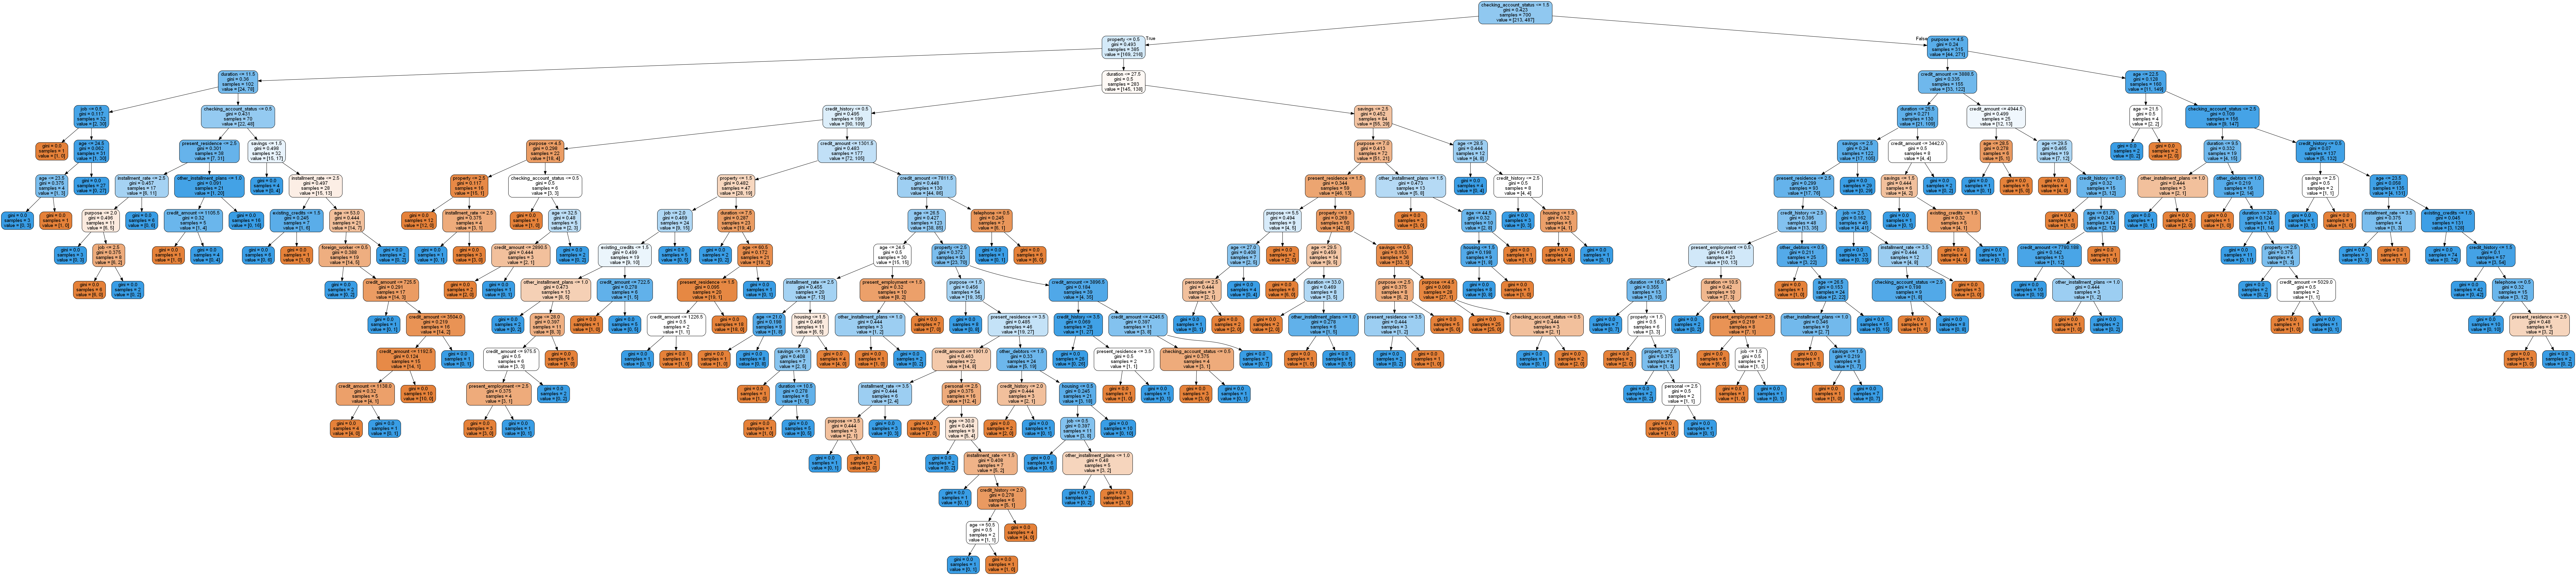

In [38]:
dot_data=StringIO()

export_graphviz(dt, out_file=dot_data, filled=True,
               feature_names=features, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

### Prediction on Train dataset

In [39]:
y_predict = dt.predict(X_train)

train = pd.concat([X_train, y_train], axis=1)

train['Predicted'] = y_predict

### Model Performance Metrics

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['customer_type'], train['Predicted'])
print(confusion_matrix)

[[213   0]
 [  0 487]]


In [41]:
Accuracy_train = ((213+487)/(213+0+0+487)*100)
print(Accuracy_train)

100.0


### Prediction on Test Dataset

In [42]:
y_prediction = dt.predict(X_test)

test = pd.concat([X_test, y_test], axis=1)
test['Predicted'] = y_prediction

### Model Performance Matrix

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['customer_type'], test['Predicted'])
print(confusion_matrix)

[[ 39  48]
 [ 53 160]]


In [48]:
Accuracy_test = ((39+160)/(39+48+53+160)*100)
print(Accuracy_test)

66.33333333333333


### Classification Report

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test['Predicted']))

              precision    recall  f1-score   support

           0       0.42      0.45      0.44        87
           1       0.77      0.75      0.76       213

    accuracy                           0.66       300
   macro avg       0.60      0.60      0.60       300
weighted avg       0.67      0.66      0.67       300



### Model Improvement by Pruning Method

In [46]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',
                                 min_samples_leaf=50,
                                 min_samples_split=100,
                                 max_depth=3)

dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

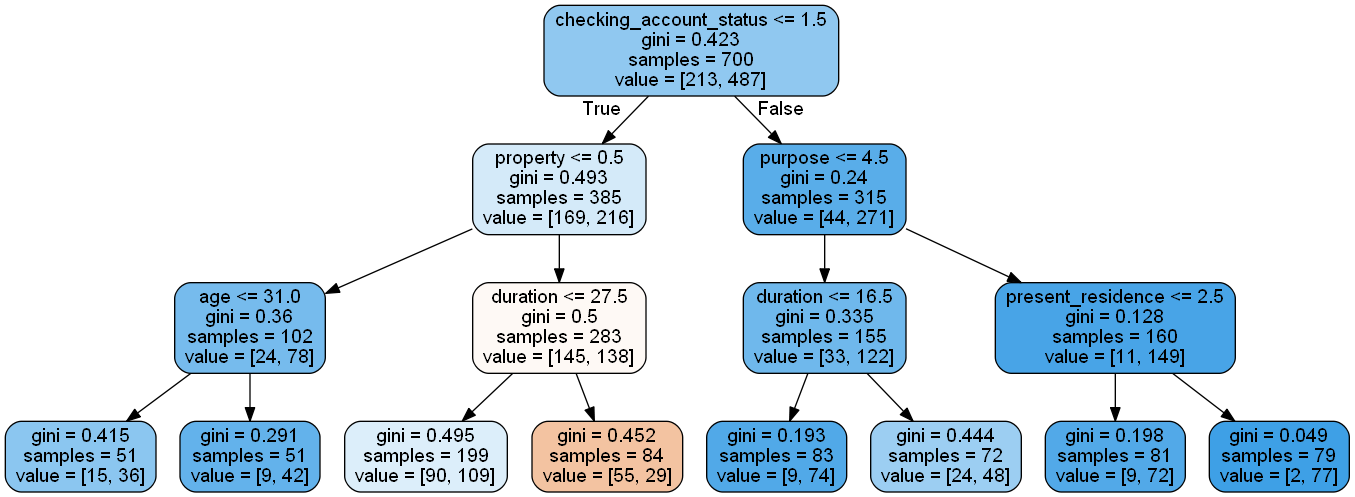

In [47]:
dot_data=StringIO()

export_graphviz(dt, out_file=dot_data, filled=True,
               feature_names=features, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())